In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

In [2]:
# Loading Data
loan_data_inputs_train = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Models\Lending Club Credit Risk\Processed Datasets for PD\loan_data_targets_test.csv', index_col = 0, header = None)

In [3]:
loan_data_inputs_train.head()

Unnamed: 0.1        id  member_id  loan_amnt  funded_amnt  \
282093        282093  29635139   32168364       8000         8000   
329078        329078  23864199   26237022       9625         9625   
327665        327665  24045040   26417756       4000         4000   
329690        329690  23964031   26336871      16000        16000   
449005        449005  11386575   13328740      16000        16000   

        funded_amnt_inv        term  int_rate  installment grade  ... dti:<12  \
282093           8000.0   36 months     11.67       264.46     B  ...       0   
329078           9625.0   36 months     18.24       349.13     D  ...       0   
327665           4000.0   36 months      8.39       126.07     A  ...       0   
329690          16000.0   36 months     10.15       517.41     B  ...       0   
449005          16000.0   36 months     14.98       554.49     C  ...       0   

       dti:12-18 dti:18-22 dti:22-30  dti:>30 mths_since_last_record:Missing  \
282093         0         1         0        0                              0   
329078         0         0         1        0                              1   
327665         1         0         0        0                              0   
329690         0         0         0        1                              0   
449005         0         0         0        1                              1   

       mths_since_last_record:0-15 mths_since_last_record:15-38  \
282093                           0                            0   
329078                           0                            0   
327665                           0                            0   
329690                           0                            1   
449005                           0                            0   

       mths_since_last_record:38-72 mths_since_last_record:>=72  
282093                            1                           0  
329078                            0                           0  
327665                            0                           1  
329690                            1                           0  
449005                            0                           0  

[5 rows x 298 columns]

In [4]:
loan_data_targets_train.head()

1
0        
282093  1
329078  1
327665  1
329690  0
449005  1

In [5]:
loan_data_inputs_train.shape

(373028, 298)

In [6]:
loan_data_targets_train.shape

(373028, 1)

### Selecting the variables

In [7]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:AK_DC_KS_WY_ID_ME',
'addr_state:TN_HI_NV',
'addr_state:AZ_RI_NY',
'addr_state:VA_LA',
'addr_state:MD_AL_IN_MO',
'addr_state:MA_AR',
'addr_state:MI_DE_WI',
'addr_state:NC_NM',
'addr_state:CO_MN_NH_KY_VT',
'addr_state:AK_KS_WY_ID_ME',
'addr_state:SC_WV_UT',
'addr_state:FL',
'addr_state:TX',
'addr_state:NJ',
'addr_state:GA',
'addr_state:OH',
'addr_state:CA',
'addr_state:IL',
'addr_state:OR',
'addr_state:WA',
'addr_state:CT',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'verification_status:Source Verified',
'verification_status:Verified',
'verification_status:Not Verified',
'purpose:house_moving',
'purpose:other_medical',
'purpose:vacation_major_purchase',
'purpose:wedding_renewable_energy',
'purpose:small_business',
'purpose:debt_consolidation',
'purpose:home_improvement',
'purpose:credit_card',
'purpose:car',
'purpose:educational',
'initial_list_status:w',
'initial_list_status:f',
'sub_grade:G5_G3_G4',
'sub_grade:G1_G2_F3_F5',
'sub_grade:E2_E4_F4_E5_F1_F2',
'sub_grade:E1',
'sub_grade:E3',
'sub_grade:D5',
'sub_grade:D4',
'sub_grade:D1',
'sub_grade:D2',
'sub_grade:D3',
'sub_grade:C5',
'sub_grade:C4',
'sub_grade:C3',
'sub_grade:C2',
'sub_grade:C1',
'sub_grade:B5',
'sub_grade:B4',
'sub_grade:B2',
'sub_grade:B3',
'sub_grade:B1',
'sub_grade:A5',
'sub_grade:A4',
'sub_grade:A3',
'sub_grade:A2',
'sub_grade:A1',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4',
'emp_length:5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'months_issue_d_date:<49',
'months_issue_d_date:49-54',
'months_issue_d_date:55-61',
'months_issue_d_date:62-77',
'months_issue_d_date:>77',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<153',
'months_since_earliest_cr_line:154-258',
'months_since_earliest_cr_line:<258-387',
'months_since_earliest_cr_line:<387',
'delinq_2yrs:<5',
'delinq_2yrs:5-10',
'delinq_2yrs:>10',
'inq_last_6mths:<4',
'inq_last_6mths:4-6',
'inq_last_6mths:>6',
'acc_now_delinq:<1',
'acc_now_delinq:>1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-7',
'mths_since_last_delinq:7-18',
'mths_since_last_delinq:18-36',
'mths_since_last_delinq:36-54',
'mths_since_last_delinq:54-82',
'mths_since_last_delinq:>=82',
'dti:<12',
'dti:12-18',
'dti:18-22',
'dti:22-30',
'dti:>30',
'mths_since_last_record:Missing',
'mths_since_last_record:0-15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-72',
'mths_since_last_record:>=72']]

In [8]:
# Removing the 1 extra dummy variable from the reference categories.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'verification_status:Source Verified',
'purpose:educational',
'initial_list_status:w',
'sub_grade:G5_G3_G4',
'term:36',
'emp_length:0',
'months_issue_d_date:<49',
'int_rate:<9.548',
'months_since_earliest_cr_line:<153',
'delinq_2yrs:<5',
'inq_last_6mths:<4',
'acc_now_delinq:<1',
'annual_inc:<20K',
'mths_since_last_delinq:0-7',
'dti:<12',
'mths_since_last_record:0-15']

In [9]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
282093        0        1        0        0        0        0   
329078        0        0        0        1        0        0   
327665        1        0        0        0        0        0   
329690        0        1        0        0        0        0   
449005        0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  \
282093                   0                        0   
329078                   0                        1   
327665                   0                        0   
329690                   0                        0   
449005                   0                        1   

        addr_state:AK_DC_KS_WY_ID_ME  addr_state:TN_HI_NV  ...  \
282093                             0                    0  ...   
329078                             0                    0  ...   
327665                             0                    0  ...   
329690                             0                    1  ...   
449005                             0                    0  ...   

        mths_since_last_delinq:54-82  mths_since_last_delinq:>=82  dti:12-18  \
282093                             1                            0          0   
329078                             0                            0          0   
327665                             0                            0          1   
329690                             0                            0          0   
449005                             0                            0          0   

        dti:18-22  dti:22-30  dti:>30  mths_since_last_record:Missing  \
282093          1          0        0                               0   
329078          0          1        0                               1   
327665          0          0        0                               0   
329690          0          0        1                               0   
449005          0          0        1                               1   

        mths_since_last_record:15-38  mths_since_last_record:38-72  \
282093                             0                             1   
329078                             0                             0   
327665                             0                             0   
329690                             1                             1   
449005                             0                             0   

        mths_since_last_record:>=72  
282093                            0  
329078                            0  
327665                            1  
329690                            0  
449005                            0  

[5 rows x 117 columns]

## PD Model Estimation

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
reg = LogisticRegression()

In [12]:
pd.options.display.max_rows = None

In [13]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [14]:
# Getting the coefficients of the PD model
reg.intercept_

array([1.06880971])

In [15]:
reg.coef_

array([[ 2.37068797e+00,  1.68290120e+00,  1.30257783e+00,
         9.22172683e-01,  9.28059059e-02,  2.74194617e-02,
         1.10333945e-01,  1.37259345e-01,  4.74111500e-01,
        -8.63376644e-04, -5.48511624e-03, -3.47712303e-03,
         1.55071790e-01,  6.86562267e-02,  2.33273149e-01,
         1.92357445e-01,  2.90293176e-01,  2.43987671e-01,
         3.38755932e-01,  6.53988073e-02,  1.18958640e-01,
         1.48231254e-01,  1.72887562e-01,  2.27668863e-01,
         1.87601182e-01,  2.53957923e-01,  4.20207992e-01,
         4.52354732e-01,  4.38802543e-01,  1.23771676e-02,
         4.65296687e-02,  4.53525412e-01,  4.38806583e-01,
         6.17958264e-01,  1.03338576e+00,  1.39640213e-01,
         3.43635510e-01,  3.36670529e-01,  3.54700002e-01,
         6.53019278e-01, -1.20286799e-03,  3.09897655e-01,
         4.54708115e-01,  7.59148617e-01,  7.33719260e-01,
        -6.84372738e-03,  1.12927546e-01,  2.99435226e-01,
         2.21768154e-01,  2.94885484e-01,  9.45338623e-0

In [16]:
# Formatting the results
feature_name = inputs_train.columns.values

In [17]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg.coef_)

In [18]:
summary_table.head()

Feature name  Coefficents
0      grade:A     2.370688
1      grade:B     1.682901
2      grade:C     1.302578
3      grade:D     0.922173
4      grade:E     0.092806

In [19]:
# Adding the coefficients to the first row
# Shifting rows by 1 place down
summary_table.index = summary_table.index + 1
# Filling the first row with the intercept
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorting by index
summary_table = summary_table.sort_index()

In [20]:
summary_table.head()

Feature name  Coefficents
0    Intercept     1.068810
1      grade:A     2.370688
2      grade:B     1.682901
3      grade:C     1.302578
4      grade:D     0.922173

## Building a Logistic Regression Model with P-values

We will select only those independent variables for our final model that help us to predict the default. We will now compute the p-values to check the statistical significance of the coefficents. The sklearn methods of calculating p-values are univariate, i.e. they take into account the impact of each feature on the outcome. In a regression model the impact of all the features is collective, rather than independent. Thus we will calculate the multivariate p-values. We can achieve this by altering the fit method of the sklearn library.

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        
    def fit(self, X, y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        

In [22]:
reg = LogisticRegression_with_p_values()

In [23]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda

In [24]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg.coef_)
# Adding the coefficients to the first row
# Shifting rows by 1 place down
summary_table.index = summary_table.index + 1
# Filling the first row with the intercept
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Sorting by index
summary_table = summary_table.sort_index()
summary_table.head()

Feature name  Coefficents
0    Intercept     1.068810
1      grade:A     2.370688
2      grade:B     1.682901
3      grade:C     1.302578
4      grade:D     0.922173

In [25]:
#  Adding the p-values to the summary_table
p_values = reg.p_values

Our p_values dont have a p-Value for the Intercept. Lets add a nan value for the intercept under the p-value column.

In [26]:
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficents      p_values
0                                 Intercept     1.068810           NaN
1                                   grade:A     2.370688  9.999991e-01
2                                   grade:B     1.682901           NaN
3                                   grade:C     1.302578           NaN
4                                   grade:D     0.922173           NaN
5                                   grade:E     0.092806  5.895728e-01
6                                   grade:F     0.027419  8.579040e-01
7                        home_ownership:OWN     0.110334  1.529855e-02
8                   home_ownership:MORTGAGE     0.137259  2.421136e-06
9              addr_state:AK_DC_KS_WY_ID_ME     0.474112  9.490831e-02
10                      addr_state:TN_HI_NV    -0.000863  9.912918e-01
11                      addr_state:AZ_RI_NY    -0.005485  9.275851e-01
12                         addr_state:VA_LA    -0.003477  9.631302e-01
13                   addr_state:MD_AL_IN_MO     0.155072  2.302325e-02
14                         addr_state:MA_AR     0.068656  4.213842e-01
15                      addr_state:MI_DE_WI     0.233273  3.538322e-03
16                         addr_state:NC_NM     0.192357  2.468734e-02
17                addr_state:CO_MN_NH_KY_VT     0.290293  1.095039e-04
18                addr_state:AK_KS_WY_ID_ME     0.243988  4.333591e-01
19                      addr_state:SC_WV_UT     0.338756  6.598125e-04
20                            addr_state:FL     0.065399  3.299011e-01
21                            addr_state:TX     0.118959  7.382066e-02
22                            addr_state:NJ     0.148231  6.518126e-02
23                            addr_state:GA     0.172888  4.238428e-02
24                            addr_state:OH     0.227669  7.627559e-03
25                            addr_state:CA     0.187601  1.754635e-03
26                            addr_state:IL     0.253958  1.978601e-03
27                            addr_state:OR     0.420208  1.824811e-03
28                            addr_state:WA     0.452355  2.772427e-05
29                            addr_state:CT     0.438803  5.318285e-04
30             verification_status:Verified     0.012377  6.820165e-01
31         verification_status:Not Verified     0.046530  1.658659e-01
32                     purpose:house_moving     0.453525  3.458497e-02
33                    purpose:other_medical     0.438807  2.275862e-02
34          purpose:vacation_major_purchase     0.617958  2.838185e-03
35         purpose:wedding_renewable_energy     1.033386  6.508702e-04
36                   purpose:small_business     0.139640  4.930463e-01
37               purpose:debt_consolidation     0.343636  6.927616e-02
38                 purpose:home_improvement     0.336671  8.534656e-02
39                      purpose:credit_card     0.354700  6.315117e-02
40                              purpose:car     0.653019  5.781128e-03
41                    initial_list_status:f    -0.001203  9.647987e-01
42                    sub_grade:G1_G2_F3_F5     0.309898  6.863238e-02
43              sub_grade:E2_E4_F4_E5_F1_F2     0.454708  2.446802e-02
44                             sub_grade:E1     0.759149  4.995675e-04
45                             sub_grade:E3     0.733719  8.896508e-04
46                             sub_grade:D5    -0.006844           NaN
47                             sub_grade:D4     0.112928           NaN
48                             sub_grade:D1     0.299435           NaN
49                             sub_grade:D2     0.221768           NaN
50                             sub_grade:D3     0.294885           NaN
51                             sub_grade:C5     0.094534           NaN
52                             sub_grade:C4     0.182792           NaN
53                             sub_grade:C3     0.276738           NaN
54                             sub_grade:C2     0.374176           NaN
55                             sub_grade:C1     0.37433

We can now compare the p-values for the variables and include only the ones with some statistical significance. However, if we remove the statistically non-significant variables from the model, there may be few variables in the model representing part or parts of the independent variable. Hence, we keep all the dummy variables of an independent variable, if atleast one dummy variable for that indepedent variable is statistically significant, i.e. having p-value < 0.05.   

In [28]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:AK_DC_KS_WY_ID_ME',
'addr_state:TN_HI_NV',
'addr_state:AZ_RI_NY',
'addr_state:VA_LA',
'addr_state:MD_AL_IN_MO',
'addr_state:MA_AR',
'addr_state:MI_DE_WI',
'addr_state:NC_NM',
'addr_state:CO_MN_NH_KY_VT',
'addr_state:AK_KS_WY_ID_ME',
'addr_state:SC_WV_UT',
'addr_state:FL',
'addr_state:TX',
'addr_state:NJ',
'addr_state:GA',
'addr_state:OH',
'addr_state:CA',
'addr_state:IL',
'addr_state:OR',
'addr_state:WA',
'addr_state:CT',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'purpose:house_moving',
'purpose:other_medical',
'purpose:vacation_major_purchase',
'purpose:wedding_renewable_energy',
'purpose:small_business',
'purpose:debt_consolidation',
'purpose:home_improvement',
'purpose:credit_card',
'purpose:car',
'purpose:educational',
'sub_grade:G5_G3_G4',
'sub_grade:G1_G2_F3_F5',
'sub_grade:E2_E4_F4_E5_F1_F2',
'sub_grade:E1',
'sub_grade:E3',
'sub_grade:D5',
'sub_grade:D4',
'sub_grade:D1',
'sub_grade:D2',
'sub_grade:D3',
'sub_grade:C5',
'sub_grade:C4',
'sub_grade:C3',
'sub_grade:C2',
'sub_grade:C1',
'sub_grade:B5',
'sub_grade:B4',
'sub_grade:B2',
'sub_grade:B3',
'sub_grade:B1',
'sub_grade:A5',
'sub_grade:A4',
'sub_grade:A3',
'sub_grade:A2',
'sub_grade:A1',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4',
'emp_length:5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'months_issue_d_date:<49',
'months_issue_d_date:49-54',
'months_issue_d_date:55-61',
'months_issue_d_date:62-77',
'months_issue_d_date:>77',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<153',
'months_since_earliest_cr_line:154-258',
'months_since_earliest_cr_line:<258-387',
'months_since_earliest_cr_line:<387',
'delinq_2yrs:<5',
'delinq_2yrs:5-10',
'delinq_2yrs:>10',
'inq_last_6mths:<4',
'inq_last_6mths:4-6',
'inq_last_6mths:>6',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-7',
'mths_since_last_delinq:7-18',
'mths_since_last_delinq:18-36',
'mths_since_last_delinq:36-54',
'mths_since_last_delinq:54-82',
'mths_since_last_delinq:>=82',
'dti:<12',
'dti:12-18',
'dti:18-22',
'dti:22-30',
'dti:>30',
'mths_since_last_record:Missing',
'mths_since_last_record:0-15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-72',
'mths_since_last_record:>=72']]

In [29]:
# Removing the 1 extra dummy variable from the reference categories.
ref_categories = ['home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'purpose:educational',
'sub_grade:G5_G3_G4',
'emp_length:0',
'months_issue_d_date:<49',
'int_rate:<9.548',
'months_since_earliest_cr_line:<153',
'delinq_2yrs:<5',
'inq_last_6mths:<4',
'mths_since_last_delinq:0-7',
'dti:<12',
'mths_since_last_record:0-15']

In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

home_ownership:OWN  home_ownership:MORTGAGE  \
282093                   0                        0   
329078                   0                        1   
327665                   0                        0   
329690                   0                        0   
449005                   0                        1   

        addr_state:AK_DC_KS_WY_ID_ME  addr_state:TN_HI_NV  \
282093                             0                    0   
329078                             0                    0   
327665                             0                    0   
329690                             0                    1   
449005                             0                    0   

        addr_state:AZ_RI_NY  addr_state:VA_LA  addr_state:MD_AL_IN_MO  \
282093                    0                 0                       0   
329078                    0                 0                       0   
327665                    0                 0                       0   
329690                    0                 0                       0   
449005                    0                 0                       0   

        addr_state:MA_AR  addr_state:MI_DE_WI  addr_state:NC_NM  ...  \
282093                 0                    0                 0  ...   
329078                 0                    0                 0  ...   
327665                 0                    0                 0  ...   
329690                 0                    0                 0  ...   
449005                 0                    0                 0  ...   

        mths_since_last_delinq:54-82  mths_since_last_delinq:>=82  dti:12-18  \
282093                             1                            0          0   
329078                             0                            0          0   
327665                             0                            0          1   
329690                             0                            0          0   
449005                             0                            0          0   

        dti:18-22  dti:22-30  dti:>30  mths_since_last_record:Missing  \
282093          1          0        0                               0   
329078          0          1        0                               1   
327665          0          0        0                               0   
329690          0          0        1                               0   
449005          0          0        1                               1   

        mths_since_last_record:15-38  mths_since_last_record:38-72  \
282093                             0                             1   
329078                             0                             0   
327665                             0                             0   
329690                             1                             1   
449005                             0                             0   

        mths_since_last_record:>=72  
282093                            0  
329078                            0  
327665                            1  
329690                            0  
449005                            0  

[5 rows x 95 columns]

In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)
# Formatting the results
feature_name = inputs_train.columns.values

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
# Adding the intercept to the first row
# Shifting rows by 1 place down
summary_table.index = summary_table.index + 1
# Filling the first row with the intercept
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
# Sorting by index
summary_table = summary_table.sort_index()
summary_table.head()

Feature name  Coefficients
0                     Intercept      1.791348
1            home_ownership:OWN      0.111988
2       home_ownership:MORTGAGE      0.172541
3  addr_state:AK_DC_KS_WY_ID_ME      0.527081
4           addr_state:TN_HI_NV     -0.002769

In [33]:
#  Adding the p-values to the summary_table
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                                Intercept      1.791348           NaN
1                       home_ownership:OWN      0.111988  1.377369e-02
2                  home_ownership:MORTGAGE      0.172541  9.502714e-10
3             addr_state:AK_DC_KS_WY_ID_ME      0.527081  6.499169e-02
4                      addr_state:TN_HI_NV     -0.002769  9.720612e-01
5                      addr_state:AZ_RI_NY      0.002093  9.722773e-01
6                         addr_state:VA_LA      0.008699  9.078155e-01
7                   addr_state:MD_AL_IN_MO      0.157274  2.105954e-02
8                         addr_state:MA_AR      0.075002  3.792206e-01
9                      addr_state:MI_DE_WI      0.227775  4.382949e-03
10                        addr_state:NC_NM      0.190373  2.616147e-02
11               addr_state:CO_MN_NH_KY_VT      0.288525  1.191076e-04
12               addr_state:AK_KS_WY_ID_ME      0.188689  5.465258e-01
13                     addr_state:SC_WV_UT      0.337755  6.898244e-04
14                           addr_state:FL      0.062871  3.485213e-01
15                           addr_state:TX      0.133202  4.484604e-02
16                           addr_state:NJ      0.165270  3.922325e-02
17                           addr_state:GA      0.179325  3.517934e-02
18                           addr_state:OH      0.222430  9.105539e-03
19                           addr_state:CA      0.204384  6.275566e-04
20                           addr_state:IL      0.259878  1.527147e-03
21                           addr_state:OR      0.433112  1.417975e-03
22                           addr_state:WA      0.458840  2.053603e-05
23                           addr_state:CT      0.458340  3.056943e-04
24                    purpose:house_moving      0.588923  4.953814e-03
25                   purpose:other_medical      0.565723  2.510558e-03
26         purpose:vacation_major_purchase      0.763160  1.560696e-04
27        purpose:wedding_renewable_energy      1.157053  1.074723e-04
28                  purpose:small_business      0.269084  1.744131e-01
29              purpose:debt_consolidation      0.483692  8.254882e-03
30                purpose:home_improvement      0.478906  1.164665e-02
31                     purpose:credit_card      0.495522  7.371273e-03
32                             purpose:car      0.789207  6.891929e-04
33                   sub_grade:G1_G2_F3_F5     -0.039144  7.911196e-01
34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310  3.180959e-01
35                            sub_grade:E1      0.407775  6.159578e-03
36                            sub_grade:E3      0.400647  8.353844e-03
37                            sub_grade:D5      0.449863  2.494667e-03
38                            sub_grade:D4      0.563951  1.392096e-04
39                            sub_grade:D1      0.707985  1.936351e-06
40                            sub_grade:D2      0.665026  6.495720e-06
41                            sub_grade:D3      0.739812  7.667606e-07
42                            sub_grade:C5      0.871273  6.874703e-09
43                            sub_grade:C4      0.953051  3.229041e-10
44                            sub_grade:C3      1.034875  1.732143e-11
45                            sub_grade:C2      1.121898  6.361043e-13
46                            sub_grade:C1      1.120733  6.974475e-13
47                            sub_grade:B5      1.248710  2.545528e-15
48                            sub_grade:B4      1.238143  9.273687e-15
49                            sub_grade:B2      1.396864  1.828367e-15
50                            sub_grade:B3      1.446643  1.914934e-17
51                            sub_grade:B1      1.513723  2.383698e-17
52                            sub_grade:A5      1.531318  2.939644e-14
53                            sub_grade:A4      1.814046  1.577190e-17
54                            sub_grade:A3      1.910714  2.085565e-16
55                            sub_grade:A2      2.1029

### PD model Validation (Test)

#### Out-of-sample validation (Test)

In [34]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,['home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:AK_DC_KS_WY_ID_ME',
'addr_state:TN_HI_NV',
'addr_state:AZ_RI_NY',
'addr_state:VA_LA',
'addr_state:MD_AL_IN_MO',
'addr_state:MA_AR',
'addr_state:MI_DE_WI',
'addr_state:NC_NM',
'addr_state:CO_MN_NH_KY_VT',
'addr_state:AK_KS_WY_ID_ME',
'addr_state:SC_WV_UT',
'addr_state:FL',
'addr_state:TX',
'addr_state:NJ',
'addr_state:GA',
'addr_state:OH',
'addr_state:CA',
'addr_state:IL',
'addr_state:OR',
'addr_state:WA',
'addr_state:CT',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'purpose:house_moving',
'purpose:other_medical',
'purpose:vacation_major_purchase',
'purpose:wedding_renewable_energy',
'purpose:small_business',
'purpose:debt_consolidation',
'purpose:home_improvement',
'purpose:credit_card',
'purpose:car',
'purpose:educational',
'sub_grade:G5_G3_G4',
'sub_grade:G1_G2_F3_F5',
'sub_grade:E2_E4_F4_E5_F1_F2',
'sub_grade:E1',
'sub_grade:E3',
'sub_grade:D5',
'sub_grade:D4',
'sub_grade:D1',
'sub_grade:D2',
'sub_grade:D3',
'sub_grade:C5',
'sub_grade:C4',
'sub_grade:C3',
'sub_grade:C2',
'sub_grade:C1',
'sub_grade:B5',
'sub_grade:B4',
'sub_grade:B2',
'sub_grade:B3',
'sub_grade:B1',
'sub_grade:A5',
'sub_grade:A4',
'sub_grade:A3',
'sub_grade:A2',
'sub_grade:A1',
'emp_length:0',
'emp_length:1',
'emp_length:2',
'emp_length:3',
'emp_length:4',
'emp_length:5',
'emp_length:6',
'emp_length:7',
'emp_length:8',
'emp_length:9',
'emp_length:10',
'months_issue_d_date:<49',
'months_issue_d_date:49-54',
'months_issue_d_date:55-61',
'months_issue_d_date:62-77',
'months_issue_d_date:>77',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<153',
'months_since_earliest_cr_line:154-258',
'months_since_earliest_cr_line:<258-387',
'months_since_earliest_cr_line:<387',
'delinq_2yrs:<5',
'delinq_2yrs:5-10',
'delinq_2yrs:>10',
'inq_last_6mths:<4',
'inq_last_6mths:4-6',
'inq_last_6mths:>6',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-7',
'mths_since_last_delinq:7-18',
'mths_since_last_delinq:18-36',
'mths_since_last_delinq:36-54',
'mths_since_last_delinq:54-82',
'mths_since_last_delinq:>=82',
'dti:<12',
'dti:12-18',
'dti:18-22',
'dti:22-30',
'dti:>30',
'mths_since_last_record:Missing',
'mths_since_last_record:0-15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-72',
'mths_since_last_record:>=72' ]]

In [35]:
# Removing the 1 extra dummy variable from the reference categories.
ref_categories = ['home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:SD_OK_MS_MT_NE_IA_ND',
'purpose:educational',
'sub_grade:G5_G3_G4',
'emp_length:0',
'months_issue_d_date:<49',
'int_rate:<9.548',
'months_since_earliest_cr_line:<153',
'delinq_2yrs:<5',
'inq_last_6mths:<4',
'mths_since_last_delinq:0-7',
'dti:<12',
'mths_since_last_record:0-15']

In [36]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

home_ownership:OWN  home_ownership:MORTGAGE  \
95028                    0                        0   
452410                   0                        0   
83239                    0                        1   
45626                    0                        0   
208822                   0                        1   

        addr_state:AK_DC_KS_WY_ID_ME  addr_state:TN_HI_NV  \
95028                              0                    0   
452410                             0                    0   
83239                              0                    0   
45626                              0                    0   
208822                             0                    0   

        addr_state:AZ_RI_NY  addr_state:VA_LA  addr_state:MD_AL_IN_MO  \
95028                     0                 0                       0   
452410                    1                 0                       0   
83239                     0                 0                       0   
45626                     0                 0                       0   
208822                    0                 0                       0   

        addr_state:MA_AR  addr_state:MI_DE_WI  addr_state:NC_NM  ...  \
95028                  0                    0                 0  ...   
452410                 0                    0                 0  ...   
83239                  0                    0                 0  ...   
45626                  0                    0                 0  ...   
208822                 0                    0                 0  ...   

        mths_since_last_delinq:54-82  mths_since_last_delinq:>=82  dti:12-18  \
95028                              0                            0          1   
452410                             0                            0          0   
83239                              0                            0          0   
45626                              0                            0          0   
208822                             1                            0          1   

        dti:18-22  dti:22-30  dti:>30  mths_since_last_record:Missing  \
95028           0          0        0                               1   
452410          0          0        0                               1   
83239           0          1        0                               1   
45626           1          0        0                               1   
208822          0          0        0                               1   

        mths_since_last_record:15-38  mths_since_last_record:38-72  \
95028                              0                             0   
452410                             0                             0   
83239                              0                             0   
45626                              0                             0   
208822                             0                             0   

        mths_since_last_record:>=72  
95028                             0  
452410                            0  
83239                             0  
45626                             0  
208822                            0  

[5 rows x 95 columns]

In [37]:
y_hat_test = reg2.model.predict(inputs_test)

In [38]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
# Computing the predicted probabilities
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.0410447 , 0.9589553 ],
       [0.02558691, 0.97441309],
       [0.01671824, 0.98328176],
       ...,
       [0.03917734, 0.96082266],
       [0.02410946, 0.97589054],
       [0.00837817, 0.99162183]])

The above returns arrays having 2 elements for each borrower. The first one explains the probability of being a bad borrower (PD) and the second one explains the probability of being a good borrower (1 - PD).

In [40]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [41]:
y_hat_test_proba

array([0.9589553 , 0.97441309, 0.98328176, ..., 0.96082266, 0.97589054,
       0.99162183])

In [42]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [43]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [44]:
df_actual_predicted_probs.shape

(93257, 2)

In [45]:
# Renaming the columns
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
# Resetting the index as the index of loan_data_inputs_test
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [46]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
95028                        1          0.958955
452410                       1          0.974413
83239                        1          0.983282
45626                        1          0.982024
208822                       1          0.996770

### Accuracy and AUC 

In [47]:
# Setting the default threshold
tr = 0.90
# Sorting by threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr,1,0)

In [48]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
95028                        1          0.958955           1
452410                       1          0.974413           1
83239                        1          0.983282           1
45626                        1          0.982024           1
208822                       1          0.996770           1

In [49]:
# Creating a Confusion Matrix
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted    0      1
Actual               
0           47   1687
1          146  91377

In [50]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.000504  0.018090
1          0.001566  0.979841

In [51]:
# Calculating Accuracy
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.9803446390083318

We get an accuracy of 98%.

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.       , 0.       , 0.       , ..., 0.9994233, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.09262153e-05, 5.46310763e-04, ...,
        9.99967221e-01, 9.99967221e-01, 1.00000000e+00]),
 array([1.99977283, 0.99977283, 0.99957042, ..., 0.50885622, 0.46285634,
        0.38623971]))

In [54]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                              df_actual_predicted_probs['y_hat_test_proba'])

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

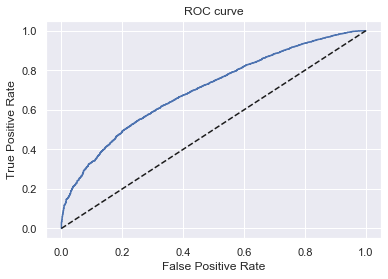

In [56]:
# ROC 
plt.plot(fpr,tpr)
# Benchmark (predicting by chance)
plt.plot(fpr,fpr,linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [57]:
# Calculating the AUROC
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7015146582487173

We get a fair AUROC score of 70.15%

### Gini Coefficient & Kolmogorov-Smirnov

In [58]:
# Soritng by predicted probabilites in ascending order
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
42404                       1          0.386240           0
42344                       1          0.435155           0
42341                       1          0.443824           0
41957                       0          0.462856           0
42442                       1          0.508856           0

In [59]:
# Reindexing the data
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test
0  42404                       1          0.386240           0
1  42344                       1          0.435155           0
2  42341                       1          0.443824           0
3  41957                       0          0.462856           0
4  42442                       1          0.508856           0

In [60]:
# Cumulative % of total population, good and bad borrowers
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [61]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42404                       1          0.386240           0   
1  42344                       1          0.435155           0   
2  42341                       1          0.443824           0   
3  41957                       0          0.462856           0   
4  42442                       1          0.508856           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  
0                        1                  1                 0  
1                        2                  2                 0  
2                        3                  3                 0  
3                        4                  3                 1  
4                        5                  4                 1

In [62]:
# Calculating Percentages
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())


Text(0.5, 1.0, 'Gini')

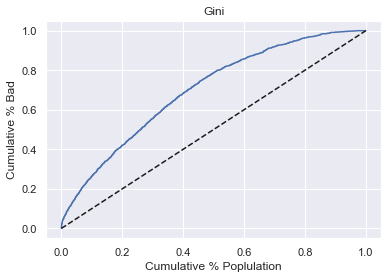

In [63]:
# Plotting Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'],
         linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Poplulation')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [64]:
Gini = AUROC *2 -1
Gini

0.40302931649743456

The Gini coefficient for our model is 40.30%

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

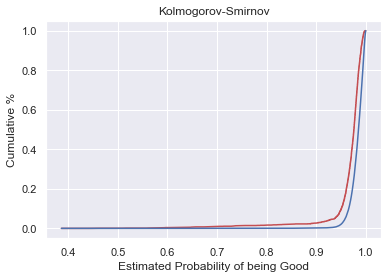

In [65]:
# Plotting the Kolmogorov-Smirnov plot
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability of being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [66]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29545389042009235

The two cumulative distribution functions are sufficiently far away from each other and the model has satisfactory predictive power.

## Applying the PD Model

#### Calculating PD of Individual Accounts

In [67]:
pd.options.display.max_columns = None

In [68]:
inputs_test_with_ref_cat.head()

home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
95028                                    1                   0   
452410                                   1                   0   
83239                                    0                   0   
45626                                    1                   0   
208822                                   0                   0   

        home_ownership:MORTGAGE  addr_state:AK_DC_KS_WY_ID_ME  \
95028                         0                             0   
452410                        0                             0   
83239                         1                             0   
45626                         0                             0   
208822                        1                             0   

        addr_state:TN_HI_NV  addr_state:AZ_RI_NY  addr_state:VA_LA  \
95028                     0                    0                 0   
452410                    0                    1                 0   
83239                     0                    0                 0   
45626                     0                    0                 0   
208822                    0                    0                 0   

        addr_state:MD_AL_IN_MO  addr_state:MA_AR  addr_state:MI_DE_WI  \
95028                        0                 0                    0   
452410                       0                 0                    0   
83239                        0                 0                    0   
45626                        0                 0                    0   
208822                       0                 0                    0   

        addr_state:NC_NM  addr_state:CO_MN_NH_KY_VT  \
95028                  0                          0   
452410                 0                          0   
83239                  0                          0   
45626                  0                          0   
208822                 0                          1   

        addr_state:AK_KS_WY_ID_ME  addr_state:SC_WV_UT  addr_state:FL  \
95028                           0                    0              0   
452410                          0                    0              0   
83239                           0                    1              0   
45626                           0                    1              0   
208822                          0                    0              0   

        addr_state:TX  addr_state:NJ  addr_state:GA  addr_state:OH  \
95028               0              0              0              1   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:CA  addr_state:IL  addr_state:OR  addr_state:WA  \
95028               0              0              0              0   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:CT  addr_state:SD_OK_MS_MT_NE_IA_ND  purpose:house_moving  \
95028               0                                0                     0   
452410              0                                0                     0   
83239               0                                0                     0   
45626               0                                0                     0   
208822              0                                0                     0   

        purpose:other_medical  purpose:vacation_major_purchase  \
95028                       0                                0   
452410                      0                                1   
83239                       0                                0   
456

In [69]:
summary_table

Feature name  Coefficients      p_values
0                                Intercept      1.791348           NaN
1                       home_ownership:OWN      0.111988  1.377369e-02
2                  home_ownership:MORTGAGE      0.172541  9.502714e-10
3             addr_state:AK_DC_KS_WY_ID_ME      0.527081  6.499169e-02
4                      addr_state:TN_HI_NV     -0.002769  9.720612e-01
5                      addr_state:AZ_RI_NY      0.002093  9.722773e-01
6                         addr_state:VA_LA      0.008699  9.078155e-01
7                   addr_state:MD_AL_IN_MO      0.157274  2.105954e-02
8                         addr_state:MA_AR      0.075002  3.792206e-01
9                      addr_state:MI_DE_WI      0.227775  4.382949e-03
10                        addr_state:NC_NM      0.190373  2.616147e-02
11               addr_state:CO_MN_NH_KY_VT      0.288525  1.191076e-04
12               addr_state:AK_KS_WY_ID_ME      0.188689  5.465258e-01
13                     addr_state:SC_WV_UT      0.337755  6.898244e-04
14                           addr_state:FL      0.062871  3.485213e-01
15                           addr_state:TX      0.133202  4.484604e-02
16                           addr_state:NJ      0.165270  3.922325e-02
17                           addr_state:GA      0.179325  3.517934e-02
18                           addr_state:OH      0.222430  9.105539e-03
19                           addr_state:CA      0.204384  6.275566e-04
20                           addr_state:IL      0.259878  1.527147e-03
21                           addr_state:OR      0.433112  1.417975e-03
22                           addr_state:WA      0.458840  2.053603e-05
23                           addr_state:CT      0.458340  3.056943e-04
24                    purpose:house_moving      0.588923  4.953814e-03
25                   purpose:other_medical      0.565723  2.510558e-03
26         purpose:vacation_major_purchase      0.763160  1.560696e-04
27        purpose:wedding_renewable_energy      1.157053  1.074723e-04
28                  purpose:small_business      0.269084  1.744131e-01
29              purpose:debt_consolidation      0.483692  8.254882e-03
30                purpose:home_improvement      0.478906  1.164665e-02
31                     purpose:credit_card      0.495522  7.371273e-03
32                             purpose:car      0.789207  6.891929e-04
33                   sub_grade:G1_G2_F3_F5     -0.039144  7.911196e-01
34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310  3.180959e-01
35                            sub_grade:E1      0.407775  6.159578e-03
36                            sub_grade:E3      0.400647  8.353844e-03
37                            sub_grade:D5      0.449863  2.494667e-03
38                            sub_grade:D4      0.563951  1.392096e-04
39                            sub_grade:D1      0.707985  1.936351e-06
40                            sub_grade:D2      0.665026  6.495720e-06
41                            sub_grade:D3      0.739812  7.667606e-07
42                            sub_grade:C5      0.871273  6.874703e-09
43                            sub_grade:C4      0.953051  3.229041e-10
44                            sub_grade:C3      1.034875  1.732143e-11
45                            sub_grade:C2      1.121898  6.361043e-13
46                            sub_grade:C1      1.120733  6.974475e-13
47                            sub_grade:B5      1.248710  2.545528e-15
48                            sub_grade:B4      1.238143  9.273687e-15
49                            sub_grade:B2      1.396864  1.828367e-15
50                            sub_grade:B3      1.446643  1.914934e-17
51                            sub_grade:B1      1.513723  2.383698e-17
52                            sub_grade:A5      1.531318  2.939644e-14
53                            sub_grade:A4      1.814046  1.577190e-17
54                            sub_grade:A3      1.910714  2.085565e-16
55                            sub_grade:A2      2.1029

In [70]:
y_hat_test_proba

array([0.9589553 , 0.97441309, 0.98328176, ..., 0.96082266, 0.97589054,
       0.99162183])

#### Creating a Score Card

In [71]:
summary_table

Feature name  Coefficients      p_values
0                                Intercept      1.791348           NaN
1                       home_ownership:OWN      0.111988  1.377369e-02
2                  home_ownership:MORTGAGE      0.172541  9.502714e-10
3             addr_state:AK_DC_KS_WY_ID_ME      0.527081  6.499169e-02
4                      addr_state:TN_HI_NV     -0.002769  9.720612e-01
5                      addr_state:AZ_RI_NY      0.002093  9.722773e-01
6                         addr_state:VA_LA      0.008699  9.078155e-01
7                   addr_state:MD_AL_IN_MO      0.157274  2.105954e-02
8                         addr_state:MA_AR      0.075002  3.792206e-01
9                      addr_state:MI_DE_WI      0.227775  4.382949e-03
10                        addr_state:NC_NM      0.190373  2.616147e-02
11               addr_state:CO_MN_NH_KY_VT      0.288525  1.191076e-04
12               addr_state:AK_KS_WY_ID_ME      0.188689  5.465258e-01
13                     addr_state:SC_WV_UT      0.337755  6.898244e-04
14                           addr_state:FL      0.062871  3.485213e-01
15                           addr_state:TX      0.133202  4.484604e-02
16                           addr_state:NJ      0.165270  3.922325e-02
17                           addr_state:GA      0.179325  3.517934e-02
18                           addr_state:OH      0.222430  9.105539e-03
19                           addr_state:CA      0.204384  6.275566e-04
20                           addr_state:IL      0.259878  1.527147e-03
21                           addr_state:OR      0.433112  1.417975e-03
22                           addr_state:WA      0.458840  2.053603e-05
23                           addr_state:CT      0.458340  3.056943e-04
24                    purpose:house_moving      0.588923  4.953814e-03
25                   purpose:other_medical      0.565723  2.510558e-03
26         purpose:vacation_major_purchase      0.763160  1.560696e-04
27        purpose:wedding_renewable_energy      1.157053  1.074723e-04
28                  purpose:small_business      0.269084  1.744131e-01
29              purpose:debt_consolidation      0.483692  8.254882e-03
30                purpose:home_improvement      0.478906  1.164665e-02
31                     purpose:credit_card      0.495522  7.371273e-03
32                             purpose:car      0.789207  6.891929e-04
33                   sub_grade:G1_G2_F3_F5     -0.039144  7.911196e-01
34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310  3.180959e-01
35                            sub_grade:E1      0.407775  6.159578e-03
36                            sub_grade:E3      0.400647  8.353844e-03
37                            sub_grade:D5      0.449863  2.494667e-03
38                            sub_grade:D4      0.563951  1.392096e-04
39                            sub_grade:D1      0.707985  1.936351e-06
40                            sub_grade:D2      0.665026  6.495720e-06
41                            sub_grade:D3      0.739812  7.667606e-07
42                            sub_grade:C5      0.871273  6.874703e-09
43                            sub_grade:C4      0.953051  3.229041e-10
44                            sub_grade:C3      1.034875  1.732143e-11
45                            sub_grade:C2      1.121898  6.361043e-13
46                            sub_grade:C1      1.120733  6.974475e-13
47                            sub_grade:B5      1.248710  2.545528e-15
48                            sub_grade:B4      1.238143  9.273687e-15
49                            sub_grade:B2      1.396864  1.828367e-15
50                            sub_grade:B3      1.446643  1.914934e-17
51                            sub_grade:B1      1.513723  2.383698e-17
52                            sub_grade:A5      1.531318  2.939644e-14
53                            sub_grade:A4      1.814046  1.577190e-17
54                            sub_grade:A3      1.910714  2.085565e-16
55                            sub_grade:A2      2.1029

In [72]:
ref_categories

['home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:SD_OK_MS_MT_NE_IA_ND',
 'purpose:educational',
 'sub_grade:G5_G3_G4',
 'emp_length:0',
 'months_issue_d_date:<49',
 'int_rate:<9.548',
 'months_since_earliest_cr_line:<153',
 'delinq_2yrs:<5',
 'inq_last_6mths:<4',
 'mths_since_last_delinq:0-7',
 'dti:<12',
 'mths_since_last_record:0-15']

In [73]:
# Creating a dataframe of ref_categories to include in the score card
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# Assuming the coefficients to be 0
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

Feature name  Coefficients  p_values
0   home_ownership:RENT_OTHER_NONE_ANY             0       NaN
1      addr_state:SD_OK_MS_MT_NE_IA_ND             0       NaN
2                  purpose:educational             0       NaN
3                   sub_grade:G5_G3_G4             0       NaN
4                         emp_length:0             0       NaN
5              months_issue_d_date:<49             0       NaN
6                      int_rate:<9.548             0       NaN
7   months_since_earliest_cr_line:<153             0       NaN
8                       delinq_2yrs:<5             0       NaN
9                    inq_last_6mths:<4             0       NaN
10          mths_since_last_delinq:0-7             0       NaN
11                             dti:<12             0       NaN
12         mths_since_last_record:0-15             0       NaN

In [74]:
df_scorecard = pd.concat([summary_table, df_ref_categories], sort = False)
df_scorecard = df_scorecard.reset_index()
df_scorecard

index                            Feature name  Coefficients      p_values
0        0                               Intercept      1.791348           NaN
1        1                      home_ownership:OWN      0.111988  1.377369e-02
2        2                 home_ownership:MORTGAGE      0.172541  9.502714e-10
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081  6.499169e-02
4        4                     addr_state:TN_HI_NV     -0.002769  9.720612e-01
5        5                     addr_state:AZ_RI_NY      0.002093  9.722773e-01
6        6                        addr_state:VA_LA      0.008699  9.078155e-01
7        7                  addr_state:MD_AL_IN_MO      0.157274  2.105954e-02
8        8                        addr_state:MA_AR      0.075002  3.792206e-01
9        9                     addr_state:MI_DE_WI      0.227775  4.382949e-03
10      10                        addr_state:NC_NM      0.190373  2.616147e-02
11      11               addr_state:CO_MN_NH_KY_VT      0.288525  1.191076e-04
12      12               addr_state:AK_KS_WY_ID_ME      0.188689  5.465258e-01
13      13                     addr_state:SC_WV_UT      0.337755  6.898244e-04
14      14                           addr_state:FL      0.062871  3.485213e-01
15      15                           addr_state:TX      0.133202  4.484604e-02
16      16                           addr_state:NJ      0.165270  3.922325e-02
17      17                           addr_state:GA      0.179325  3.517934e-02
18      18                           addr_state:OH      0.222430  9.105539e-03
19      19                           addr_state:CA      0.204384  6.275566e-04
20      20                           addr_state:IL      0.259878  1.527147e-03
21      21                           addr_state:OR      0.433112  1.417975e-03
22      22                           addr_state:WA      0.458840  2.053603e-05
23      23                           addr_state:CT      0.458340  3.056943e-04
24      24                    purpose:house_moving      0.588923  4.953814e-03
25      25                   purpose:other_medical      0.565723  2.510558e-03
26      26         purpose:vacation_major_purchase      0.763160  1.560696e-04
27      27        purpose:wedding_renewable_energy      1.157053  1.074723e-04
28      28                  purpose:small_business      0.269084  1.744131e-01
29      29              purpose:debt_consolidation      0.483692  8.254882e-03
30      30                purpose:home_improvement      0.478906  1.164665e-02
31      31                     purpose:credit_card      0.495522  7.371273e-03
32      32                             purpose:car      0.789207  6.891929e-04
33      33                   sub_grade:G1_G2_F3_F5     -0.039144  7.911196e-01
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310  3.180959e-01
35      35                            sub_grade:E1      0.407775  6.159578e-03
36      36                            sub_grade:E3      0.400647  8.353844e-03
37      37                            sub_grade:D5      0.449863  2.494667e-03
38      38                            sub_grade:D4      0.563951  1.392096e-04
39      39                            sub_grade:D1      0.707985  1.936351e-06
40      40                            sub_grade:D2      0.665026  6.495720e-06
41      41                            sub_grade:D3      0.739812  7.667606e-07
42      42                            sub_grade:C5      0.871273  6.874703e-09
43      43                            sub_grade:C4      0.953051  3.229041e-10
44      44                            sub_grade:C3      1.034875  1.732143e-11
45      45                            sub_grade:C2      1.121898  6.361043e-13
46      46                            sub_grade:C1      1.120733  6.974475e-13
47      47                            sub_grade:B5      1.248710  2.545528e-15
48      48                            sub_grade:B4      1.238143  9.273687e-15
49      49                            sub_grade:B2     

In [75]:
# Adding a column containing the name of the original variable
df_scorecard['Original Feature Name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [76]:
df_scorecard

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

Let us set the minimum score as 300 and the maximum score as 850.

In [77]:
min_score = 300
max_score = 850

In [78]:
# Computing the minimum coefficient sum for each Original Feature
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
min_sum_coef

-2.251618445590269

In [79]:
# Computing the maximum coefficient sum for each Original Feature
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()
max_sum_coef

8.946703467165666

In [80]:
# Calculating Variable Scores
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

In [81]:
# Calculating the value around the minimum desired score or the intercept score
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
df_scorecard

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

In [83]:
# Rounding the scores
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

In [84]:
# Checking if the minimum & maximum possible scores are equal to the desired minimum and maximum scores
min_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].min().sum()
min_sum_score_prel

302.0

In [85]:
max_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Preliminary'].max().sum()
max_sum_score_prel

851.0

We observe that the max score is 851 & the min score is 302. This difference is due to the rounding of the scores. So we subtract the differences from the variable that was rounded the most.

In [86]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

In [87]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][87] = 31
df_scorecard['Score - Final'][95] = -3
df_scorecard['Score - Final'][81] = -124
df_scorecard

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

In [88]:
# Checking if the minimum & maximum possible scores are equal to the desired minimum and maximum scores
min_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [89]:
max_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

#### Calculating Credit Score

In [90]:
inputs_test_with_ref_cat.head()

home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
95028                                    1                   0   
452410                                   1                   0   
83239                                    0                   0   
45626                                    1                   0   
208822                                   0                   0   

        home_ownership:MORTGAGE  addr_state:AK_DC_KS_WY_ID_ME  \
95028                         0                             0   
452410                        0                             0   
83239                         1                             0   
45626                         0                             0   
208822                        1                             0   

        addr_state:TN_HI_NV  addr_state:AZ_RI_NY  addr_state:VA_LA  \
95028                     0                    0                 0   
452410                    0                    1                 0   
83239                     0                    0                 0   
45626                     0                    0                 0   
208822                    0                    0                 0   

        addr_state:MD_AL_IN_MO  addr_state:MA_AR  addr_state:MI_DE_WI  \
95028                        0                 0                    0   
452410                       0                 0                    0   
83239                        0                 0                    0   
45626                        0                 0                    0   
208822                       0                 0                    0   

        addr_state:NC_NM  addr_state:CO_MN_NH_KY_VT  \
95028                  0                          0   
452410                 0                          0   
83239                  0                          0   
45626                  0                          0   
208822                 0                          1   

        addr_state:AK_KS_WY_ID_ME  addr_state:SC_WV_UT  addr_state:FL  \
95028                           0                    0              0   
452410                          0                    0              0   
83239                           0                    1              0   
45626                           0                    1              0   
208822                          0                    0              0   

        addr_state:TX  addr_state:NJ  addr_state:GA  addr_state:OH  \
95028               0              0              0              1   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:CA  addr_state:IL  addr_state:OR  addr_state:WA  \
95028               0              0              0              0   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:CT  addr_state:SD_OK_MS_MT_NE_IA_ND  purpose:house_moving  \
95028               0                                0                     0   
452410              0                                0                     0   
83239               0                                0                     0   
45626               0                                0                     0   
208822              0                                0                     0   

        purpose:other_medical  purpose:vacation_major_purchase  \
95028                       0                                0   
452410                      0                                1   
83239                       0                                0   
456

In [91]:
df_scorecard

index                            Feature name  Coefficients  \
0        0                               Intercept      1.791348   
1        1                      home_ownership:OWN      0.111988   
2        2                 home_ownership:MORTGAGE      0.172541   
3        3            addr_state:AK_DC_KS_WY_ID_ME      0.527081   
4        4                     addr_state:TN_HI_NV     -0.002769   
5        5                     addr_state:AZ_RI_NY      0.002093   
6        6                        addr_state:VA_LA      0.008699   
7        7                  addr_state:MD_AL_IN_MO      0.157274   
8        8                        addr_state:MA_AR      0.075002   
9        9                     addr_state:MI_DE_WI      0.227775   
10      10                        addr_state:NC_NM      0.190373   
11      11               addr_state:CO_MN_NH_KY_VT      0.288525   
12      12               addr_state:AK_KS_WY_ID_ME      0.188689   
13      13                     addr_state:SC_WV_UT      0.337755   
14      14                           addr_state:FL      0.062871   
15      15                           addr_state:TX      0.133202   
16      16                           addr_state:NJ      0.165270   
17      17                           addr_state:GA      0.179325   
18      18                           addr_state:OH      0.222430   
19      19                           addr_state:CA      0.204384   
20      20                           addr_state:IL      0.259878   
21      21                           addr_state:OR      0.433112   
22      22                           addr_state:WA      0.458840   
23      23                           addr_state:CT      0.458340   
24      24                    purpose:house_moving      0.588923   
25      25                   purpose:other_medical      0.565723   
26      26         purpose:vacation_major_purchase      0.763160   
27      27        purpose:wedding_renewable_energy      1.157053   
28      28                  purpose:small_business      0.269084   
29      29              purpose:debt_consolidation      0.483692   
30      30                purpose:home_improvement      0.478906   
31      31                     purpose:credit_card      0.495522   
32      32                             purpose:car      0.789207   
33      33                   sub_grade:G1_G2_F3_F5     -0.039144   
34      34             sub_grade:E2_E4_F4_E5_F1_F2      0.133310   
35      35                            sub_grade:E1      0.407775   
36      36                            sub_grade:E3      0.400647   
37      37                            sub_grade:D5      0.449863   
38      38                            sub_grade:D4      0.563951   
39      39                            sub_grade:D1      0.707985   
40      40                            sub_grade:D2      0.665026   
41      41                            sub_grade:D3      0.739812   
42      42                            sub_grade:C5      0.871273   
43      43                            sub_grade:C4      0.953051   
44      44                            sub_grade:C3      1.034875   
45      45                            sub_grade:C2      1.121898   
46      46                            sub_grade:C1      1.120733   
47      47                            sub_grade:B5      1.248710   
48      48                            sub_grade:B4      1.238143   
49      49                            sub_grade:B2      1.396864   
50      50                            sub_grade:B3      1.446643   
51      51                            sub_grade:B1      1.513723   
52      52                            sub_grade:A5      1.531318   
53      53                            sub_grade:A4      1.814046   
54      54                            sub_grade:A3      1.910714   
55      55                            sub_grade:A2      2.102978   
56      56                            sub_grade:A1      2.478846   
57      57                            emp_length:1      0.034

In [92]:
# Calculating the credit scores
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
# Inserting a column of one's for the intercept multiplication
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [93]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
95028           1                                   1                   0   
452410          1                                   1                   0   
83239           1                                   0                   0   
45626           1                                   1                   0   
208822          1                                   0                   0   

        home_ownership:MORTGAGE  addr_state:AK_DC_KS_WY_ID_ME  \
95028                         0                             0   
452410                        0                             0   
83239                         1                             0   
45626                         0                             0   
208822                        1                             0   

        addr_state:TN_HI_NV  addr_state:AZ_RI_NY  addr_state:VA_LA  \
95028                     0                    0                 0   
452410                    0                    1                 0   
83239                     0                    0                 0   
45626                     0                    0                 0   
208822                    0                    0                 0   

        addr_state:MD_AL_IN_MO  addr_state:MA_AR  addr_state:MI_DE_WI  \
95028                        0                 0                    0   
452410                       0                 0                    0   
83239                        0                 0                    0   
45626                        0                 0                    0   
208822                       0                 0                    0   

        addr_state:NC_NM  addr_state:CO_MN_NH_KY_VT  \
95028                  0                          0   
452410                 0                          0   
83239                  0                          0   
45626                  0                          0   
208822                 0                          1   

        addr_state:AK_KS_WY_ID_ME  addr_state:SC_WV_UT  addr_state:FL  \
95028                           0                    0              0   
452410                          0                    0              0   
83239                           0                    1              0   
45626                           0                    1              0   
208822                          0                    0              0   

        addr_state:TX  addr_state:NJ  addr_state:GA  addr_state:OH  \
95028               0              0              0              1   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:CA  addr_state:IL  addr_state:OR  addr_state:WA  \
95028               0              0              0              0   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:CT  addr_state:SD_OK_MS_MT_NE_IA_ND  purpose:house_moving  \
95028               0                                0                     0   
452410              0                                0                     0   
83239               0                                0                     0   
45626               0                                0                     0   
208822              0                                0                     0   

        purpose:other_medical  purpose:vacation_major_purchase  \
95028                       0                                0   
452410                      0                                1   
832

In [94]:
# Setting the order of the feature names as per the scorecard
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [95]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  home_ownership:OWN  home_ownership:MORTGAGE  \
95028           1                   0                        0   
452410          1                   0                        0   
83239           1                   0                        1   
45626           1                   0                        0   
208822          1                   0                        1   

        addr_state:AK_DC_KS_WY_ID_ME  addr_state:TN_HI_NV  \
95028                              0                    0   
452410                             0                    0   
83239                              0                    0   
45626                              0                    0   
208822                             0                    0   

        addr_state:AZ_RI_NY  addr_state:VA_LA  addr_state:MD_AL_IN_MO  \
95028                     0                 0                       0   
452410                    1                 0                       0   
83239                     0                 0                       0   
45626                     0                 0                       0   
208822                    0                 0                       0   

        addr_state:MA_AR  addr_state:MI_DE_WI  addr_state:NC_NM  \
95028                  0                    0                 0   
452410                 0                    0                 0   
83239                  0                    0                 0   
45626                  0                    0                 0   
208822                 0                    0                 0   

        addr_state:CO_MN_NH_KY_VT  addr_state:AK_KS_WY_ID_ME  \
95028                           0                          0   
452410                          0                          0   
83239                           0                          0   
45626                           0                          0   
208822                          1                          0   

        addr_state:SC_WV_UT  addr_state:FL  addr_state:TX  addr_state:NJ  \
95028                     0              0              0              0   
452410                    0              0              0              0   
83239                     1              0              0              0   
45626                     1              0              0              0   
208822                    0              0              0              0   

        addr_state:GA  addr_state:OH  addr_state:CA  addr_state:IL  \
95028               0              1              0              0   
452410              0              0              0              0   
83239               0              0              0              0   
45626               0              0              0              0   
208822              0              0              0              0   

        addr_state:OR  addr_state:WA  addr_state:CT  purpose:house_moving  \
95028               0              0              0                     0   
452410              0              0              0                     0   
83239               0              0              0                     0   
45626               0              0              0                     0   
208822              0              0              0                     0   

        purpose:other_medical  purpose:vacation_major_purchase  \
95028                       0                                0   
452410                      0                                1   
83239                       0                                0   
45626                       0                                0   
208822                      0                                0   

        purpose:wedding_renewable_energy  purpose:small_business  \
95028                                  0                       1   
452410                                 0                       0   
83239                                  0                       0   
45626  

In [96]:
# Creating a variables with the ordered scores
scorecard_scores = df_scorecard['Score - Final']

In [97]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 109)

In [98]:
scorecard_scores.shape

(109,)

In [99]:
# Making the shape compatible for multiplication
scorecard_scores = scorecard_scores.values.reshape(109,1)

In [100]:
scorecard_scores.shape

(109, 1)

In [101]:
# Calculating the dot product of test data and test data scores
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [102]:
y_scores.head()

0
95028   565.0
452410  588.0
83239   610.0
45626   608.0
208822  692.0

#### From Credit Score to PD

In [103]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [104]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

In [105]:
y_hat_proba_from_score.head()

0
95028   0.958669
452410  0.973718
83239   0.983046
45626   0.982354
208822  0.996763

### Setting Cut-off rate

In [106]:
# Setting the default threshold
tr = 0.90
# Sorting by threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr,1,0)

In [107]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42404                       1          0.386240           0   
1  42344                       1          0.435155           0   
2  42341                       1          0.443824           0   
3  41957                       0          0.462856           0   
4  42442                       1          0.508856           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
0                        1                  1                 0   
1                        2                  2                 0   
2                        3                  3                 0   
3                        4                  3                 1   
4                        5                  4                 1   

   Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
0                    0.000011              0.000011             0.000000  
1                    0.000021              0.000022             0.000000  
2                    0.000032              0.000033             0.000000  
3                    0.000043              0.000033             0.000577  
4                    0.000054              0.000044             0.000577

In [108]:
# Creating a Confusion Matrix
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted    0      1
Actual               
0           47   1687
1          146  91377

In [109]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.000504  0.018090
1          0.001566  0.979841

In [110]:
# Calculating Accuracy
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.9803446390083318

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score

In [112]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.       , 0.       , 0.       , ..., 0.9994233, 1.       ,
        1.       ]),
 array([0.00000000e+00, 1.09262153e-05, 5.46310763e-04, ...,
        9.99967221e-01, 9.99967221e-01, 1.00000000e+00]),
 array([1.99977283, 0.99977283, 0.99957042, ..., 0.50885622, 0.46285634,
        0.38623971]))

In [113]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                              df_actual_predicted_probs['y_hat_test_proba'])

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

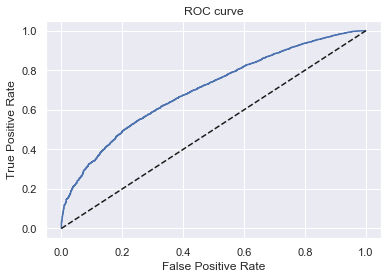

In [115]:
# ROC 
plt.plot(fpr,tpr)
# Benchmark (predicting by chance)
plt.plot(fpr,fpr,linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [116]:
# Creating a dataframe for cut-offs
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [117]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [118]:
df_cutoffs.head()

thresholds  fpr       tpr
0    1.999773  0.0  0.000000
1    0.999773  0.0  0.000011
2    0.999570  0.0  0.000546
3    0.999570  0.0  0.000568
4    0.999526  0.0  0.001224

In [119]:
# Setting the threshold of the first row to probability very close to 1
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)

In [120]:
df_cutoffs.head()

thresholds  fpr       tpr
0    1.000000  0.0  0.000000
1    0.999773  0.0  0.000011
2    0.999570  0.0  0.000546
3    0.999570  0.0  0.000568
4    0.999526  0.0  0.001224

In [121]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [122]:
df_cutoffs.head()

thresholds  fpr       tpr   Score
0    1.000000  0.0  0.000000  1459.0
1    0.999773  0.0  0.000011   823.0
2    0.999570  0.0  0.000546   791.0
3    0.999570  0.0  0.000568   791.0
4    0.999526  0.0  0.001224   786.0

In [123]:
# Setting the score of the intercept as the max score 850
df_cutoffs['Score'][0] = max_score

In [124]:
df_cutoffs.head()

thresholds  fpr       tpr  Score
0    1.000000  0.0  0.000000  850.0
1    0.999773  0.0  0.000011  823.0
2    0.999570  0.0  0.000546  791.0
3    0.999570  0.0  0.000568  791.0
4    0.999526  0.0  0.001224  786.0

In [125]:
# Function to calculate the number of approved borrowers for given threshold
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [126]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [127]:
df_cutoffs

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
0       1.000000  0.000000  0.000000  850.0           0       93257   
1       0.999773  0.000000  0.000011  823.0           1       93256   
2       0.999570  0.000000  0.000546  791.0          50       93207   
3       0.999570  0.000000  0.000568  791.0          52       93205   
4       0.999526  0.000000  0.001224  786.0         112       93145   
5       0.999524  0.000000  0.001246  786.0         114       93143   
6       0.999516  0.000000  0.001333  786.0         122       93135   
7       0.999516  0.000000  0.001355  785.0         124       93133   
8       0.999508  0.000000  0.001420  785.0         130       93127   
9       0.999508  0.000000  0.001442  785.0         132       93125   
10      0.999490  0.000000  0.001650  783.0         151       93106   
11      0.999489  0.000000  0.001672  783.0         153       93104   
12      0.999460  0.000000  0.002087  780.0         191       93066   
13      0.999460  0.000000  0.002120  780.0         194       93063   
14      0.999458  0.000000  0.002131  780.0         195       93062   
15      0.999458  0.000000  0.002152  780.0         197       93060   
16      0.999449  0.000000  0.002404  779.0         220       93037   
17      0.999449  0.000000  0.002426  779.0         222       93035   
18      0.999419  0.000000  0.002841  776.0         260       92997   
19      0.999417  0.000000  0.002863  776.0         262       92995   
20      0.999417  0.000000  0.002874  776.0         263       92994   
21      0.999416  0.000000  0.002895  776.0         265       92992   
22      0.999371  0.000000  0.003584  773.0         328       92929   
23      0.999371  0.000000  0.003606  773.0         330       92927   
24      0.999321  0.000000  0.004403  769.0         403       92854   
25      0.999320  0.000000  0.004425  769.0         405       92852   
26      0.999220  0.000000  0.006261  762.0         573       92684   
27      0.999219  0.000000  0.006283  762.0         575       92682   
28      0.999153  0.000000  0.007484  758.0         685       92572   
29      0.999152  0.000000  0.007506  758.0         687       92570   
30      0.999149  0.000000  0.007561  758.0         692       92565   
31      0.999149  0.000000  0.007583  758.0         694       92563   
32      0.999121  0.000000  0.008140  756.0         745       92512   
33      0.999120  0.000000  0.008162  756.0         747       92510   
34      0.999110  0.000000  0.008260  756.0         756       92501   
35      0.999110  0.000000  0.008282  756.0         758       92499   
36      0.999099  0.000000  0.008522  755.0         780       92477   
37      0.999099  0.000000  0.008544  755.0         782       92475   
38      0.999068  0.000000  0.009123  753.0         835       92422   
39      0.999067  0.000000  0.009145  753.0         837       92420   
40      0.999058  0.000000  0.009298  753.0         851       92406   
41      0.999057  0.000000  0.009320  753.0         853       92404   
42      0.999013  0.000000  0.010292  750.0         942       92315   
43      0.999012  0.000000  0.010314  750.0         944       92313   
44      0.998961  0.000000  0.011494  748.0        1052       92205   
45      0.998961  0.000000  0.011516  748.0        1054       92203   
46      0.998950  0.000000  0.011778  747.0        1078       92179   
47      0.998950  0.000000  0.011800  747.0        1080       92177   
48      0.998936  0.000000  0.012041  747.0        1102       92155   
49      0.998935  0.000000  0.012063  747.0        1104       92153   
50      0.998923  0.000000  0.012358  746.0        1131       92126   
51      0.998923  0.000000  0.012379  746.0        1133       92124   
52      0.998903  0.000000  0.012806  745.0        1172       92085   
53      0.998903  0.000000  0.012827  745.0        1174       92083   
54      0.998882  0.000000  0.013385  744.0        1225       92032   
55      0.998881  0.000000  0.

For a cutoff rate of 90% we would have an approval rate of 99.78% and a rejection rate of 0.22%. 
For a cutoff score of 640 we would have an approval rate of 30.87% and a rejection rate of 69.13%.

In [128]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat_final.csv')
df_scorecard.to_csv('df_scorecard_final.csv')

In [129]:
import pickle
pickle.dump(reg2, open('reg_pd.sav', 'wb'))